In [11]:
import matplotlib.pyplot as plt

# 한글 출력이 가능한 폰트로 설정하기
from matplotlib import font_manager, rc
import platform     # 플랫폼 관련 라이브러리 - 각각의 플랫폼에 따른 폰트 설정을 위해

platform.system()   # Windows

if platform.system() == 'Windows' :
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin' :
    rc('font', family='AppleGothic')
else :
    print('check your OS system')

In [3]:
### 데이터 시각화
import pandas as pd
df = pd.read_excel('data/kto_total.xlsx')

In [4]:
condition = (df['국적'] == '중국')
df_filter = df[condition]

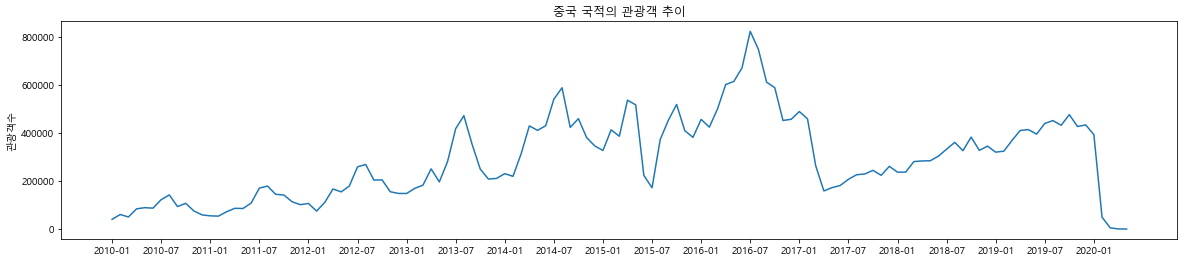

In [18]:
# 그래프 크기 조절
plt.figure(figsize=(20,4))  

# 그래프 내용
plt.plot(df_filter['기준연월'], df_filter['관광'])

# 그래프 타이틀, x축, y축 이름 달기
plt.title("중국 국적의 관광객 추이")
plt.xlabel('기준연월', fontdict={'color':'w'})
plt.ylabel('관광객수')

# x축 눈금값 설정
dates = df_filter['기준연월'].unique()
plt.xticks(dates[0::6])

plt.show()


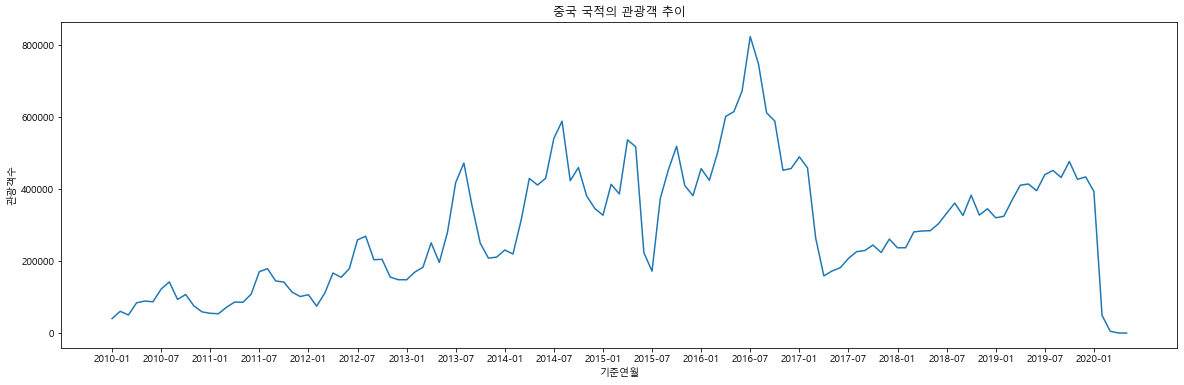

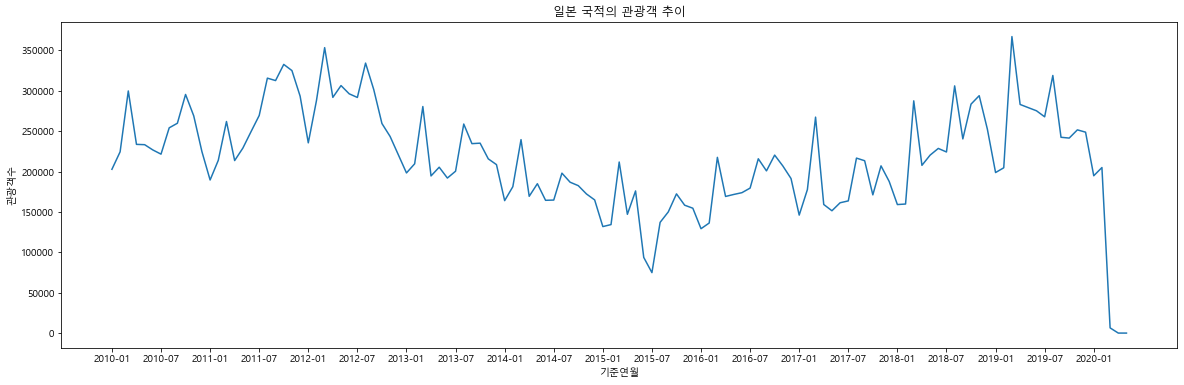

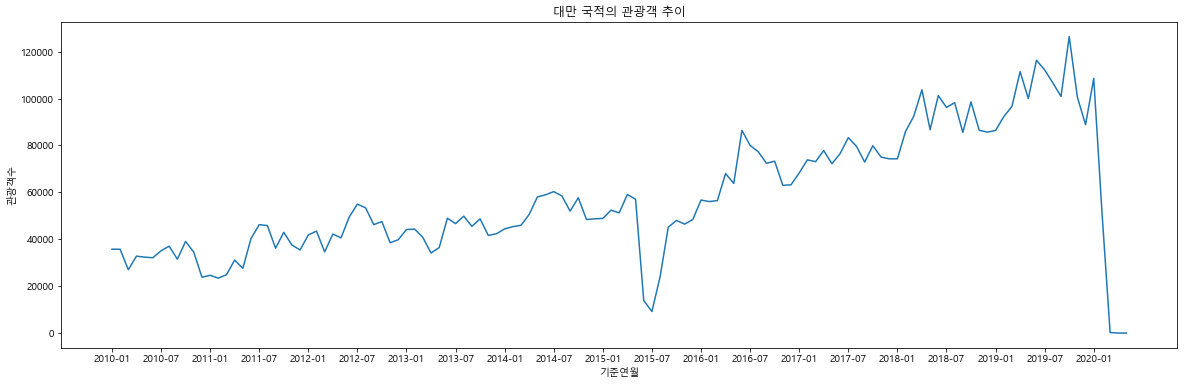

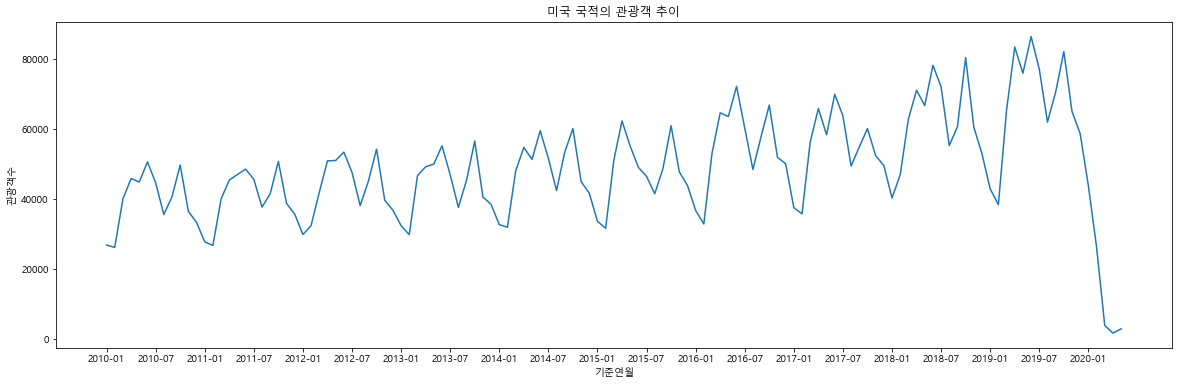

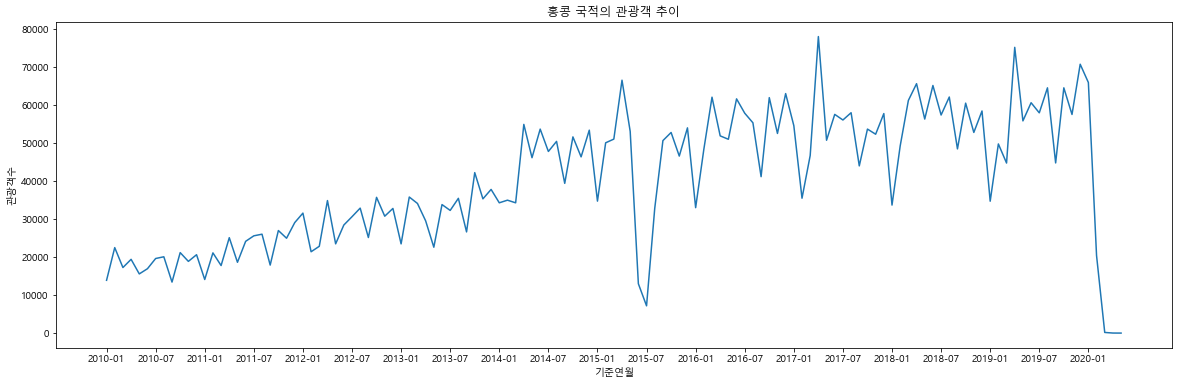

In [20]:
### 상위 5개 국가를 기준으로 그래프 그리기
cntry_list = ['중국','일본','대만','미국','홍콩']

### 반복문으로 그래프 그리기

for cntry in cntry_list :
    ## 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    ## 그래프 그리기
    plt.figure(figsize=(20,6))
    plt.plot(df_filter['기준연월'], df_filter['관광'])
    plt.title(f'{cntry} 국적의 관광객 추이')
    plt.xlabel('기준연월')
    plt.ylabel('관광객수')
    
    dates = df_filter['기준연월'].unique()
    plt.xticks(dates[0::6])
    plt.show()

##### 히트맵 그래프 그리기 

In [25]:
### 히트맵 그래프는 매트릭스 형태로 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법
## X축, Y축 그래프 내용이 어떤 변수가 들어가야 할 지 잘 생각해야 함 (데이터에 따라 각 색상이 달라지기 때문)

# X축에는 월(month)을, Y축에는 연도(Year)를 넣고 그래프 내용에는 관광객 숫자 넣기

## str.slice() 함수를 통해 기준연월을 column으로 사용하기(연도, 월)
df['연도'] = df['기준연월'].str.slice(0,4)
df['월'] = df['기준연월'].str.slice(5,7)

## 중국인 관광객 기준으로 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

## 피벗테이블 만들기
df_pivot = df_filter.pivot_table(values='관광', index='연도', columns='월')
df_pivot.head()

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0


In [29]:
### 히트맵은 seaborn 라이브러리를 통해 나타냄 (seaborn은 matplotlib에 종속됨)
# pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

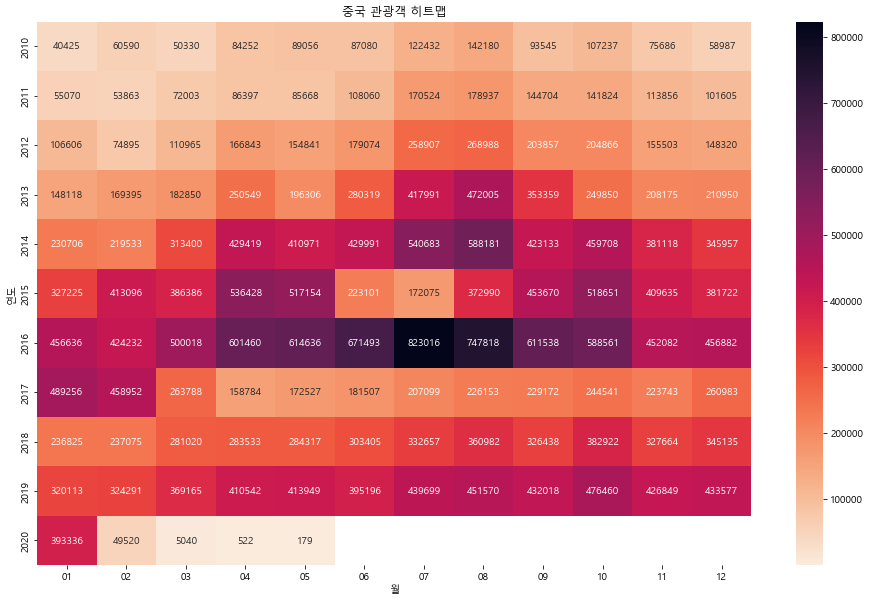

In [33]:
## 그래프 크기 설정
plt.figure(figsize=(16,10))

## 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
# annot : 각 셀 안에 실제값 표시여부 / fmt : 값의 숫자형태(.0f : 소수점 없는 실수) / cmap : 그래프 색 조합

## 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

## 그래프
plt.show()

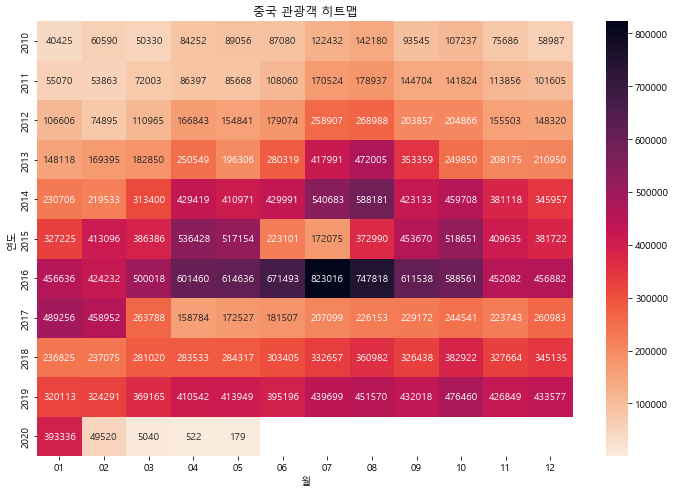

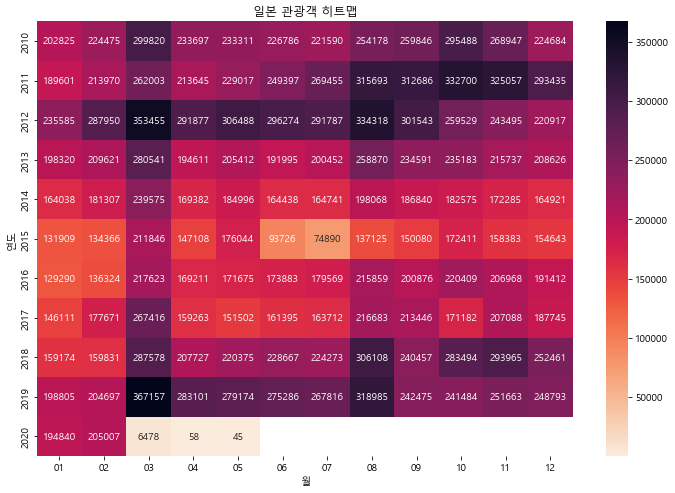

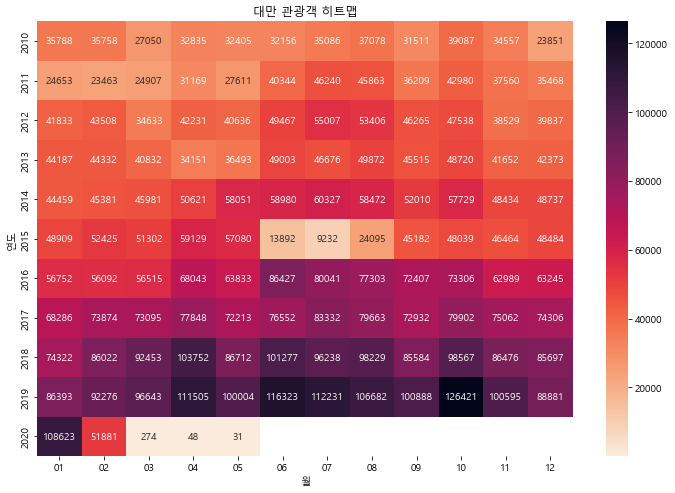

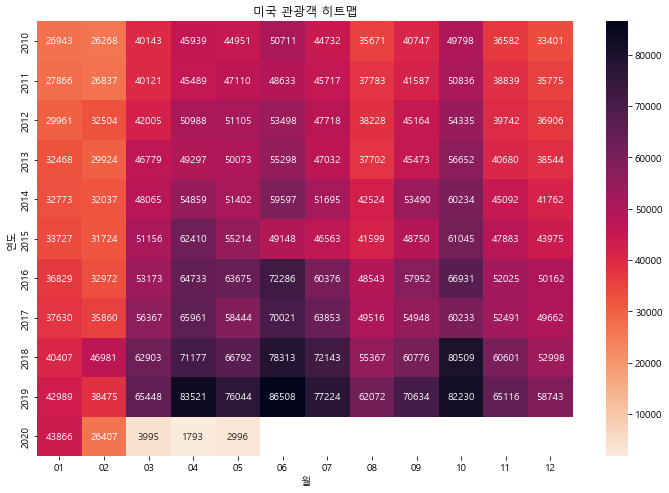

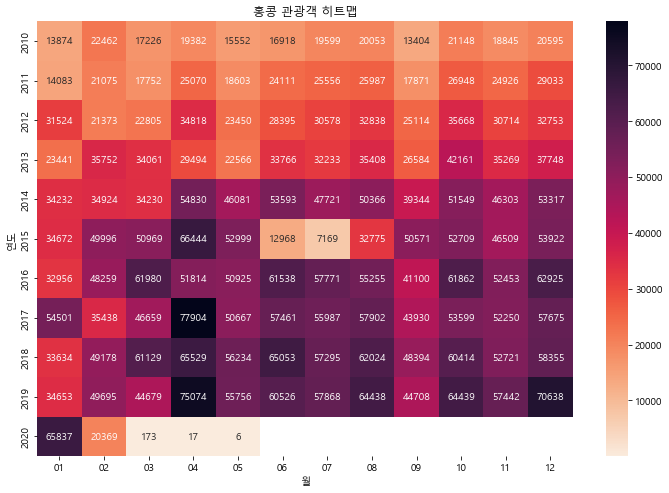

In [37]:
### 반복문을 사용하여 상위 5개국에 대한 히트맵 그래프 그리기

for cntry in cntry_list :
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    df_pivot = df_filter.pivot_table(values='관광', index='연도', columns = '월')
    plt.figure(figsize=(12,8))
    plt.title(f'{cntry} 관광객 히트맵')
    sns.heatmap(df_pivot, annot=True, fmt='.0f',cmap='rocket_r')